In [2]:
pip install spotipy

Note: you may need to restart the kernel to use updated packages.


In [85]:
import spotipy
import numpy as np
from spotipy.oauth2 import SpotifyClientCredentials
import pprint
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras import  layers
from sklearn.preprocessing import LabelEncoder

In [86]:
#Spotify API
client_id = "86b24daeea3648e69ec3bb1f37c54773"
client_secret = "f67b407043814b3f8f077a9ddede7341"
# Spotify API 액세스 설정       
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [87]:
#OpenWeatherMap API
openweathermap_api_key = "e00693dc6f9c360b3b1cb0d1686404a8"

In [88]:
# List에 date, weather정보 넣음
def get_weekly_weather(api_key):
    url = f'http://api.openweathermap.org/data/2.5/forecast?q=Seoul,KR&appid={api_key}'
    response = requests.get(url)
    data = response.json()
    
    if 'list' in data:
        weekly_weather = {}
        for entry in data['list']:
            date = entry['dt_txt'].split()[0]
            weather_condition = entry['weather'][0]['main']
            weekly_weather[date] = weather_condition
        return weekly_weather
    else:
        print("API 응답에서 주간 날씨 데이터를 찾을 수 없습니다.")
        return None

In [89]:
# weather_condition에 따른 spotify 트랙url값을 가져옴
def get_playlist_id_for_weather(weather_condition):
    playlists = {
        'Clear': '37i9dQZF1DWU2LcZVHsTdv',  
        'Rain': '37i9dQZF1DX0KpeLFJlRPg'
    }
    return playlists.get(weather_condition, None)

In [90]:
# Spotify APi 트랙 내 정보가져옴
def get_playlist_tracks(playlist_id):
    playlist_tracks = sp.playlist_tracks(playlist_id)
    tracks = []
    for track in playlist_tracks['items']:
        track_name = track['track']['name']
        artist_name = track['track']['artists'][0]['name']
        tracks.append((track_name, artist_name))
    return tracks

In [91]:
# spotify에서 추천할 플레이리스트 ID값을 저장
def recommend_playlist_for_weather(city, weather_condition):
    playlist_id = get_playlist_id_for_weather(weather_condition)
    
    #플레이리스트가 있는지 확인
    if playlist_id:
        print(f"{city}의 현재 날씨: {weather_condition}")
        print("추천 플레이리스트 및 노래 정보:")
        tracks = get_playlist_tracks(playlist_id)
        for track in tracks:
            print(f"노래: {track[0]}, 아티스트: {track[1]}")
    else:
        print(f"{city}의 현재 날씨에 따른 추천 플레이리스트가 없습니다.")

In [92]:
if __name__ == '__main__':
    # 날씨 정보 가져오기
    city = 'Seoul'  # 도시 이름
    country = 'KR'  # 국가 코드 (예: 'US' 또는 'KR')
    
    # 이번 주 전국 날씨 가져오기
    weekly_weather = get_weekly_weather(openweathermap_api_key)

In [93]:
def build_weather_prediction_model():
    model = Sequential([
        Dense(32, activation='relu', input_shape=(1,)),  # 날씨 정보를 입력으로 받음
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')  # 이진 분류를 위한 시그모이드 활성화 함수 사용
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [94]:
    model = build_weather_prediction_model()

In [95]:
#날씨 데이터와 레이블 생성
dates = list(weekly_weather.keys())
labels = list(weekly_weather.values())
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

In [102]:
# 데이터를 모델에 맞게 변환
X = np.array(range(len(dates)))
y = np.array(encoded_labels)

# 훈련 데이터와 테스트 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 훈련
history = model.fit(X_train, y_train, epochs=100, batch_size=1, validation_data=(X_test, y_test))

Epoch 1/100
1/4 [======>.......................] - ETA: 0s - loss: 0.0434 - accuracy: 1.0000

4/4 [==============================] - 0s 13ms/step - loss: 0.3314 - accuracy: 0.7500 - val_loss: 0.6896 - val_accuracy: 0.5000
Epoch 2/100
4/4 [==============================] - 0s 7ms/step - loss: 0.3302 - accuracy: 0.7500 - val_loss: 0.6900 - val_accuracy: 0.5000
Epoch 3/100
4/4 [==============================] - 0s 8ms/step - loss: 0.3297 - accuracy: 0.7500 - val_loss: 0.6905 - val_accuracy: 0.5000
Epoch 4/100
4/4 [==============================] - 0s 7ms/step - loss: 0.3290 - accuracy: 0.7500 - val_loss: 0.6910 - val_accuracy: 0.5000
Epoch 5/100
4/4 [==============================] - 0s 7ms/step - loss: 0.3285 - accuracy: 0.7500 - val_loss: 0.6908 - val_accuracy: 0.5000
Epoch 6/100
4/4 [==============================] - 0s 7ms/step - loss: 0.3269 - accuracy: 0.7500 - val_loss: 0.6910 - val_accuracy: 0.5000
Epoch 7/100
4/4 [==============================] - 0s 7ms/step - loss: 0.3264 - accuracy: 0.7500 - val_loss: 0.6911 - val_accuracy: 0.5000
Epoch 8/100
4/4 [=====================

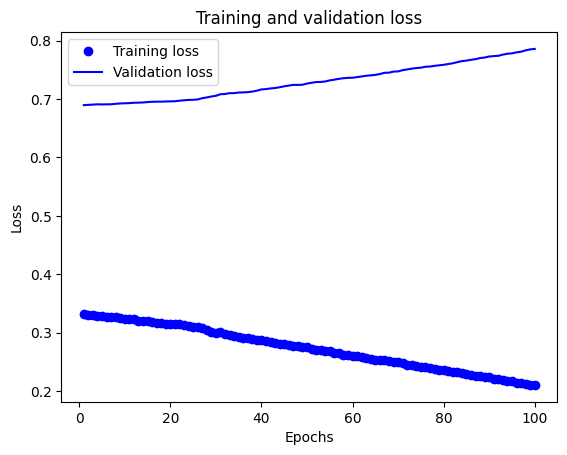

In [103]:
# 손실율 시각화
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [98]:
# 이번 주 전국 날씨에 대한 예측 및 추천
predictions = model.predict(X)
predictions_labels = label_encoder.inverse_transform((predictions > 0.5).astype(int).flatten())
    
for date, prediction_label in zip(dates, predictions_labels):
    print(f"{date}: {prediction_label}")

# 날씨에 따른 Spotify 플레이리스트 추천
for date, prediction_label in zip(dates, predictions_labels):
    recommend_playlist_for_weather(f"{city} - {date}", prediction_label)

1/1 [==============================] - 0s 80ms/step
2023-11-13: Clouds
2023-11-14: Clear
2023-11-15: Clear
2023-11-16: Clear
2023-11-17: Clear
2023-11-18: Clear
Seoul - 2023-11-13의 현재 날씨에 따른 추천 플레이리스트가 없습니다.
Seoul - 2023-11-14의 현재 날씨: Clear
추천 플레이리스트 및 노래 정보:
노래: Way Home, 아티스트: Tyler Hubbard
노래: Be A Light, 아티스트: Thomas Rhett
노래: Where I Find God, 아티스트: Larry Fleet
노래: Country Boy's Prayer, 아티스트: Kameron Marlowe
노래: The Struggle, 아티스트: Zach Williams
노래: My Jesus, 아티스트: Anne Wilson
노래: Somewhere in the Sunshine, 아티스트: Charles Esten
노래: Prayin' In A Deer Stand, 아티스트: Luke Bryan
노래: Seven Minutes In Heaven, 아티스트: Reba McEntire
노래: More Than Me, 아티스트: Ian Munsick
노래: Heaven Down Here, 아티스트: Mickey Guyton
노래: How I Learned to Pray, 아티스트: Charlie Worsham
노래: There's Something About That Name, 아티스트: Gaither
노래: God and a Good Man, 아티스트: Meghan Patrick
노래: The Other Side, 아티스트: Lauren Alaina
노래: Show Me Around, 아티스트: Carly Pearce
노래: If That Ain't God, 아티스트: Chris Young
노래: Jesus in a Bar, 아티